In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import skfuzzy as fuzz
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [19]:
# Load the data and encode categorical features
df = pd.read_csv('diamonds.csv')
le = LabelEncoder()
df['cut'] = le.fit_transform(df['cut'])
df['color'] = le.fit_transform(df['color'])
df['clarity'] = le.fit_transform(df['clarity'])

In [3]:
# Select the features and normalize the data
X = df[['depth', 'price', 'carat', 'cut']]
Xnrm = (X - X.mean()) / X.std()

In [4]:
# Perform PCA on the normalized data
pca = PCA(n_components=2)
components = pca.fit_transform(Xnrm)

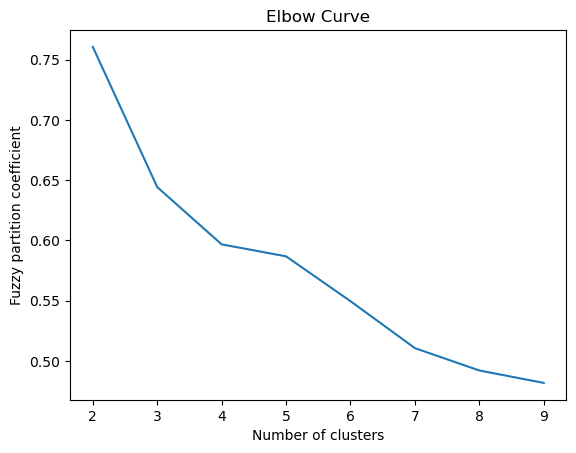

In [5]:
# Use elbow method to determine the optimal number of clusters
fpcs = []
for c in range(2, 10):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(components.T, c=c, m=2, error=0.005, maxiter=100000, init=None)
    fpcs.append(fpc)
fig, ax = plt.subplots()
ax.plot(range(2, 10), fpcs)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Fuzzy partition coefficient')
ax.set_title('Elbow Curve')
plt.show()

In [6]:
# Evaluate the clustering using silhouette score and Davies-Bouldin index
silh_scores = []
davb_scores = []
for c in range(2, 10):
    # Set up the Fuzzy C-Means clustering algorithm
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(components.T, c=c, m=2, error=0.005, maxiter=100000, init=None)
    cluster_labels = np.argmax(u, axis=0)
    silh_scores.append(silhouette_score(Xnrm, cluster_labels))
    davb_scores.append(davies_bouldin_score(Xnrm, cluster_labels))

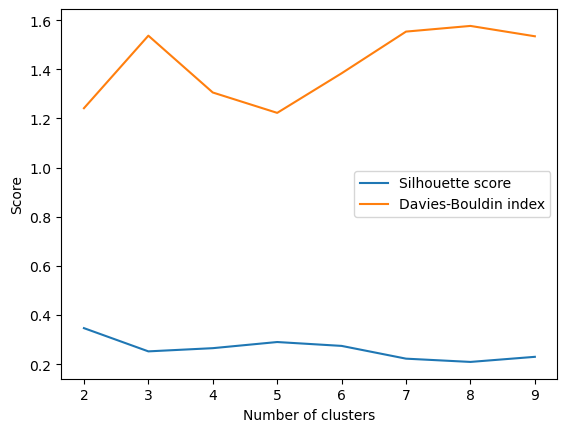

In [7]:
# Plot the evaluation metrics
fig, ax = plt.subplots()
ax.plot(range(2, 10), silh_scores, label='Silhouette score')
ax.plot(range(2, 10), davb_scores, label='Davies-Bouldin index')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Score')
ax.legend()
plt.show()

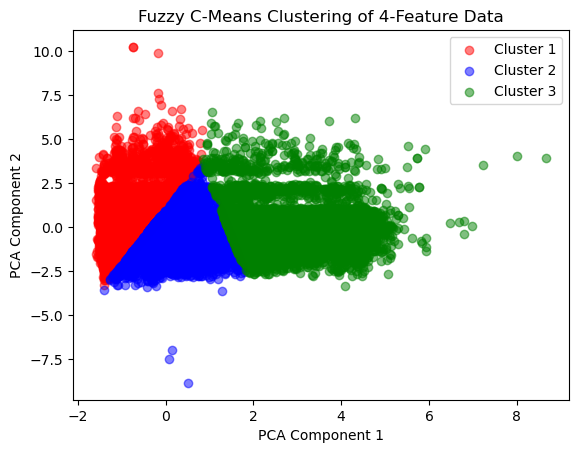

In [17]:
# Visualize the clustering using a scatter plot
optimal_c = 3  # Optimal number of clusters from elbow method
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(components.T, c=optimal_c, m=2, error=0.005, maxiter=1000, init=None)
cluster_labels = np.argmax(u, axis=0)
colors = ['red', 'blue', 'green']
labelnames = ['Cluster 1', 'Cluster 2', 'Cluster 3']
fig, ax = plt.subplots()
for i in range(len(colors)):
    ax.scatter(components[cluster_labels == i, 0], components[cluster_labels == i, 1], c=colors[i], label=labelnames[i], alpha=0.5)
ax.set_title(f'Fuzzy C-Means Clustering of {X.shape[1]}-Feature Data')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.legend()
plt.show()


In [14]:
silhouette = silhouette_score(Xnrm, cluster_labels)
davies_bouldin = davies_bouldin_score(Xnrm, cluster_labels)

# Print the performance metrics
print("Silhouette Coefficient:", silhouette)
print("Davies-Bouldin Index:", davies_bouldin)

Silhouette Coefficient: 0.25204782139759496
Davies-Bouldin Index: 1.5367571887151257
